In [151]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
user_list = pd.read_csv('data/user_list_GH1.csv')
train = pd.read_csv('data/train.csv')

In [184]:
train['ID'] = train['gender'].astype(str) + ' & ' + train['car'].astype(str) + ' & ' + train['reality'].astype(str) + ' & ' + \
                train['child_num'].astype(str) + ' & ' + train['income_total'].astype(str) + ' & ' + train['income_type'].astype(str) + ' & ' + \
                    train['edu_type'].astype(str) + ' & ' + train['family_type'].astype(str) + ' & ' + train['house_type'].astype(str) + ' & ' + \
                        train['DAYS_BIRTH'].astype(str) + ' & ' + train['DAYS_EMPLOYED'].astype(str) + ' & ' + train['work_phone'].astype(str) + ' & ' + \
                            train['phone'].astype(str) + ' & ' + train['email'].astype(str)  + ' & ' + train['family_size'].astype(str)
#쓸모없는 칼럼 삭제
train.drop(['FLAG_MOBIL'], axis=1, inplace=True)   
train.drop(columns=['index'], inplace=True)

In [185]:
for i in tqdm(range(len(train))):
    a = train.iloc[i]['ID']
    b = abs(int(train[train['ID']==a]['begin_month'].mean()))
    user_list.loc[(user_list['ID']==a), 'begin_month_mean'] =  b

100%|██████████| 26457/26457 [01:52<00:00, 235.21it/s]


In [186]:
len(user_list)

8759

In [187]:
print(len(train))
print(len(train[train['begin_month']<0]))
print(len(train[train['begin_month']==0]))

26457
26226
231


In [189]:
print(len(user_list))
print(len(user_list[user_list['begin_month']==0]))
print(len(user_list[user_list['begin_month']>0]))
print(len(user_list[user_list['begin_month']<0]))
print(len(user_list[user_list['begin_month_mean']==0]))
print(len(user_list[user_list['begin_month_mean']>0]))

8759
214
0
8545
29
8730


In [191]:
# 신규로 카드를 개설한 사람의 수
len(train[train['begin_month']==0.0]['ID'].unique())

214

In [193]:
# 카드를 신규 개설하고 그 카드가 첫번째인 사람의 수
len(user_list[user_list['begin_month_mean']==0.0])

29

/Users/jeong-giho/.conda/envs/pythonProject4/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


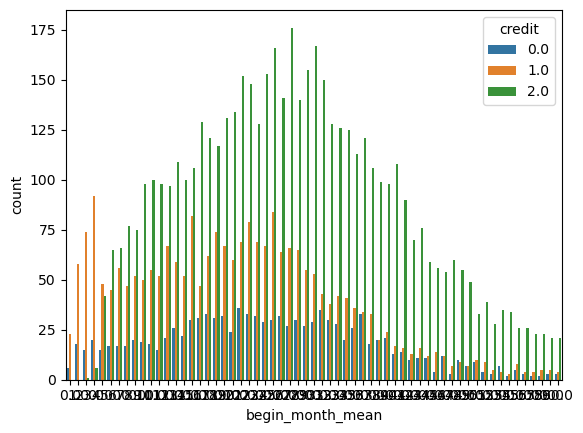

In [195]:
sns.countplot('begin_month_mean', data = user_list, hue='credit')
plt.show()

In [201]:
def category_beginmonth(user_list: pd.DataFrame) -> pd.DataFrame:
    conditions = [
        (user_list["begin_month_mean"].le(10)),
        (user_list["begin_month_mean"].gt(10) & user_list["begin_month_mean"].le(20)),
        (user_list["begin_month_mean"].gt(20) & user_list["begin_month_mean"].le(30)),
        (user_list["begin_month_mean"].gt(30) & user_list["begin_month_mean"].le(40)),
        (user_list["begin_month_mean"].gt(40) & user_list["begin_month_mean"].le(50)),
        (user_list["begin_month_mean"].gt(50) & user_list["begin_month_mean"].le(60)),
    ]
    choices = [i for i in range(6)]

    user_list["categorical_month"] = np.select(conditions, choices)
    
    return user_list

In [202]:
category_beginmonth(user_list)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,phone,email,occyp_type,family_size,begin_month,credit,ID,card_num,begin_month_mean,categorical_month
0,F,N,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,With parents,-11453,...,0,0,Medicine staff,2.0,0.0,1.0,F & N & N & 0 & 112500.0 & Commercial associat...,1.0,0.0,0
1,F,N,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-15499,...,0,0,Private service staff,2.0,0.0,0.0,F & N & N & 0 & 135000.0 & Working & Secondary...,5.0,14.0,1
2,F,N,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-19003,...,0,0,Medicine staff,2.0,0.0,0.0,F & N & N & 0 & 135000.0 & Working & Secondary...,2.0,8.0,0
3,F,N,N,0,135000.0,Working,Secondary / secondary special,Married,With parents,-12278,...,0,0,NaN,2.0,0.0,0.0,F & N & N & 0 & 135000.0 & Working & Secondary...,8.0,17.0,1
4,F,N,N,0,157500.0,State servant,Higher education,Married,House / apartment,-11588,...,1,0,Core staff,2.0,0.0,0.0,F & N & N & 0 & 157500.0 & State servant & Hig...,9.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,M,Y,N,3,360000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15262,...,0,0,Managers,5.0,-60.0,2.0,M & Y & N & 3 & 360000.0 & Commercial associat...,1.0,60.0,5
8755,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-12167,...,0,0,Drivers,2.0,-60.0,2.0,M & Y & Y & 0 & 112500.0 & Working & Secondary...,1.0,60.0,5
8756,M,Y,Y,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17847,...,0,0,Laborers,2.0,-60.0,0.0,M & Y & Y & 0 & 270000.0 & Commercial associat...,1.0,60.0,5
8757,M,Y,Y,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-18661,...,0,0,Managers,2.0,-60.0,2.0,M & Y & Y & 0 & 315000.0 & Commercial associat...,1.0,60.0,5


In [205]:
# user_list.drop(columns=['Unnamed: 0'], inplace = True)

In [204]:
user_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             8759 non-null   object 
 1   car                8759 non-null   object 
 2   reality            8759 non-null   object 
 3   child_num          8759 non-null   int64  
 4   income_total       8759 non-null   float64
 5   income_type        8759 non-null   object 
 6   edu_type           8759 non-null   object 
 7   family_type        8759 non-null   object 
 8   house_type         8759 non-null   object 
 9   DAYS_BIRTH         8759 non-null   int64  
 10  DAYS_EMPLOYED      8759 non-null   int64  
 11  work_phone         8759 non-null   int64  
 12  phone              8759 non-null   int64  
 13  email              8759 non-null   int64  
 14  occyp_type         6078 non-null   object 
 15  family_size        8759 non-null   float64
 16  begin_month        8759 

In [206]:
user_list['categorical_month'].value_counts()

2    2502
1    2029
3    1746
0    1312
4     809
5     361
Name: categorical_month, dtype: int64

/Users/jeong-giho/.conda/envs/pythonProject4/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


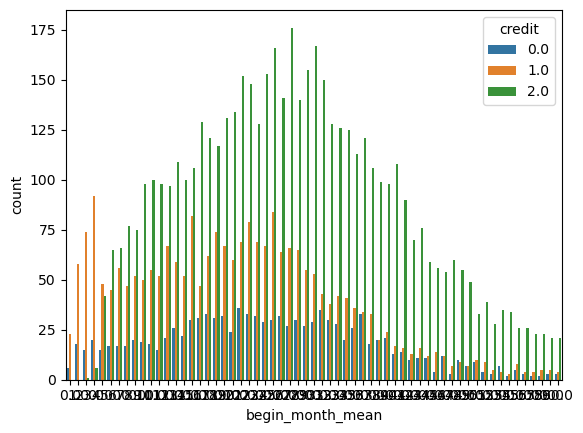

In [208]:
sns.countplot('begin_month_mean', data = user_list, hue='credit')
plt.show()

In [209]:
user_list.to_csv('data/user_list_GH2.csv')